## Análisis de velocidad y aceleración de mecanismo Manivela-balancín

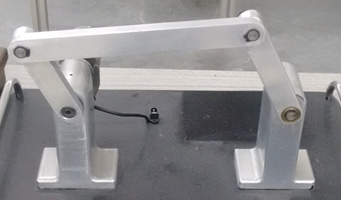

## Análisis vectorial

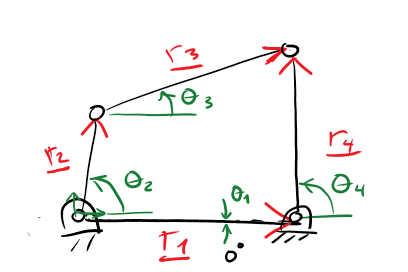

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}+\overrightarrow{r_{3}}-\overrightarrow{r_{4}}-\overrightarrow{r_{1}}=0$ (1)

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})+r3\cdot cos(\theta_{3})-r4\cdot cos(\theta_{4})-r1\cdot cos(\theta_{1})=0$, (2)

$r2\cdot sin(\theta_{2})+r3\cdot sin(\theta_{3})-r4\cdot sin(\theta_{4})-r1\cdot sin(\theta_{1})=0$ (3)

En este cuaderno desarrollaremos el análisis de velocidad y aceleración. Para esto debemos contar con el análisis de posición correctamente desarrollado.

Para ver este desarrollo con las anotaciones correspondientes:

### https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/ManivelaBalancin/Manivela%20Balancin_listas.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation


def manivela_balancin(x0, params):
    #variable de entrada y parámetros
    ## Primero la variable de entrada
    th2v = params[0]
    ## Luego los parámetros
    r2 = params[1]
    r3 = params[2]
    r4 = params[3]
    r1 = params[4]
    th1 = params[5]
    
    #estos son arrays de Numpy
    th3v = x0[0]
    th4v = x0[1]
    
    Y = np.zeros(2)
    Y[0] = r2*np.cos(th2v) + r3*np.cos(th3v) - r4*np.cos(th4v) - r1*np.cos(th1);
    Y[1] = r2*np.sin(th2v) + r3*np.sin(th3v) - r4*np.sin(th4v) - r1*np.sin(th1);
    
    return Y
    pass

# le damos valores a los parámetros y variables

r2 = 60
r3 = 150
r4 = 100 
r1 = 160 
th1 = 0

# Declaramos las condiciones iniciales

th2 = np.deg2rad(69)
varEntrada = th2
params = [varEntrada,r2,r3,r4,r1,th1]

print("Parámetros: ",params)

th3 = np.deg2rad(17)
th4 = np.deg2rad(87)

x0 = np.array([th3,th4])
print("Condiciones iniciales: ",np.rad2deg(x0))
# ...y probamos la función

Y = manivela_balancin(x0, params)
print("Evaluación de la función: ",Y)

# si el resultado es un array con valores cercanos a cero, la implementación del análisis está bien. Como regla, si el valor entero es 0, sirve.
# 
# Ahora especificamos el número de iteraciones

numpos = 50

# Luego definimos el vector que contiene los valores de la variable de entrada que queremos analizar

th2v = np.linspace(0,2*np.pi,numpos)

# Y continuamos con el resto del programa. Esto al fin y al cabo es una prueba.

th3v = np.zeros(numpos)
th4v = np.zeros(numpos)
exitflagV = np.zeros(numpos)

# Probar fsolve

[th3,th4] = fsolve(manivela_balancin,x0, args = params)

print("Solución usando fsolve: ",np.rad2deg(th3),np.rad2deg(th4),)

# esto debe dar valores de las variables secundarias, verificar con análisis gráfico
# 
# ## Solución al sistema de ecuaciones con fsolve
for i in range(0,numpos):
    params[0] = th2v[i]
    q,info,exitflagV[i],mensaje = fsolve(manivela_balancin,
                                        x0, 
                                        args = params,
                                        full_output = True)
    th3v[i] = q[0]
    th4v[i] = q[1]
    x0 = q
    if exitflagV[i] != 1:
        print('Error en la iteración ' + str(i))
        break
if i+1 == numpos:
    print('se ejecutaron todas las iteraciones: ' + str(numpos))
    print(np.rad2deg(th3v))
    print(np.rad2deg(th4v))

Parámetros:  [1.2042771838760873, 60, 150, 100, 160, 0]
Condiciones iniciales:  [17. 87.]
Evaluación de la función:  [-0.28580526  0.00762782]
Solución usando fsolve:  17.002814875713092 87.16520310311058
se ejecutaron todas las iteraciones: 50
[41.40962211 37.09798365 33.10948483 29.57042515 26.52315973 23.95144303
 21.80851461 20.03776595 18.58452092 17.40132581 16.44952545 15.69908113
 15.12774084 14.72010751 14.46683588 14.36402744 14.41281179 14.61905368
 14.99308179 15.5492857  16.3053737  17.28105113 18.4959185  19.96656778
 21.70319643 23.70645307 25.96541552 28.45734157 31.149183   34.00020225
 36.9647704  39.99460979 43.04013715 46.05090257 48.97529854 51.75975682
 54.34763041 56.67793308 58.68412051 60.29317064 61.42538399 61.99560298
 61.9169473  61.10859575 59.50929422 57.09738175 53.9150301  50.08849403
 45.83013042 41.40962211]
[ 82.81924422  78.96073034  76.30110719  74.88396386  74.637675
  75.42287899  77.07616758  79.43829465  82.36757275  85.7435865
  89.46594404  9

## Análisis de velocidad: teoría

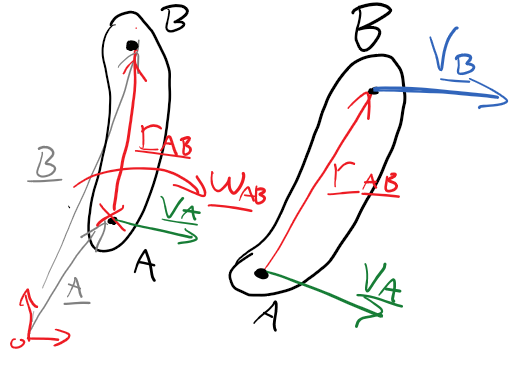

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{V_B} = \overrightarrow{V_A}+\overrightarrow{\omega}\times \overrightarrow{r_{AB}}$, (4)

Donde $\overrightarrow{\omega}$ es el vector de velocidad angular de la barra analizada.

Usualmente no tenemos el valor de $\overrightarrow{\omega}$, ya que las componentes escalares de esta son

$\overrightarrow{\omega} = \begin{bmatrix}
0 & 0 & \dot{\theta} 
\end{bmatrix}$ (5)

siendo $\dot{\theta}$ la magnitud de la velocidad angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de posición escalares, obtenidas a partir de las ecuaciones de cierre vectorial.

### Velocidad de la barra de entrada

Si la barra analizada es una barra de entrada, la derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d} \theta}{\mathrm{d} t} = \dot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d} r}{\mathrm{d} t} = \dot{r}$

### Derivadas de las ecuaciones de cierre vectorial

Derivando (1) y (2) con respecto al tiempo tenemos

$-r_2sin(\theta_{2})\dot{\theta_{2}} - r_3sin(\theta_{3})\dot{\theta_{3}} + r_4sin(\theta_{4})\dot{\theta_{4}}=0$, (6)

$r_2cos(\theta_{2})\dot{\theta_{2}} + r_3cos(\theta_{3})\dot{\theta_{3}} - r_4cos(\theta_{4})\dot{\theta_{4}}=0$. (7)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

$A = \begin{bmatrix}
- r_3sin(\theta_{3}) & r_4sin(\theta_{4})\\ 
r_3cos(\theta_{3}) & - r_4cos(\theta_{4})
\end{bmatrix}$,

$x = \begin{bmatrix}
\dot{\theta_{3}}\\ 
\dot{\theta_{4}}
\end{bmatrix}$ y

$b = \begin{bmatrix}
r_2sin(\theta_{2})\dot{\theta_{2}}\\ 
-r_2cos(\theta_{2})\dot{\theta_{2}}
\end{bmatrix}$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\dot{\theta_2}$. Vamos a asumir en este caso que la manivela rota a 60 rev/m, i.e., 1 rev/s

In [2]:
th2p = 2*np.pi # velocidad en radianes por segundo

### Solución del sistema de ecuaciones lineal

Usaremos la función solve del módulo numpy.linalg. Descomente la siguiente línea para revisar la ayuda

In [3]:
#help(np.linalg.solve)
#dir(np.linalg)

Hagámoslo para una sola posición inicialmente

In [4]:
pos = 27 #posicion 15 de numpos posiciones
th2 = th2v[pos]
th3 = th3v[pos]
th4 = th4v[pos]
print("theta2= ",np.rad2deg(th2),"theta3= ",np.rad2deg(th3),"theta4= ",np.rad2deg(th4))

am = [[-r3*np.sin(th3),r4*np.sin(th4)],
      [r3*np.cos(th3),-r4*np.cos(th4)]]
bv = [r2*np.sin(th2)*th2p,
      -r2*np.cos(th2)*th2p]
print(am,bv)
[th3p,th4p] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print(th3p,th4p)

theta2=  198.36734693877548 theta3=  28.457341573975754 theta4=  148.28519008066732
[[-71.4756483563051, 52.569155274891635], [131.87581920900365, 85.06752561162416]] [-118.79299953945313, 357.7855875187069]
2.2219496238089795 0.7613264894225447


## Verificación numérica

Podemos hacer una verificación con base en el análisis de posición usando derivación numérica. Para esto necesitaremos las gráficas de posición de las variables secundarias respecto a la de entrada

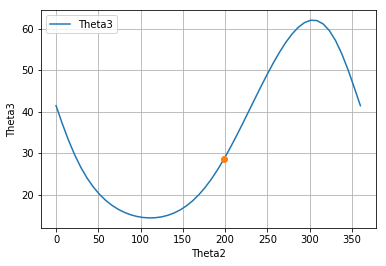

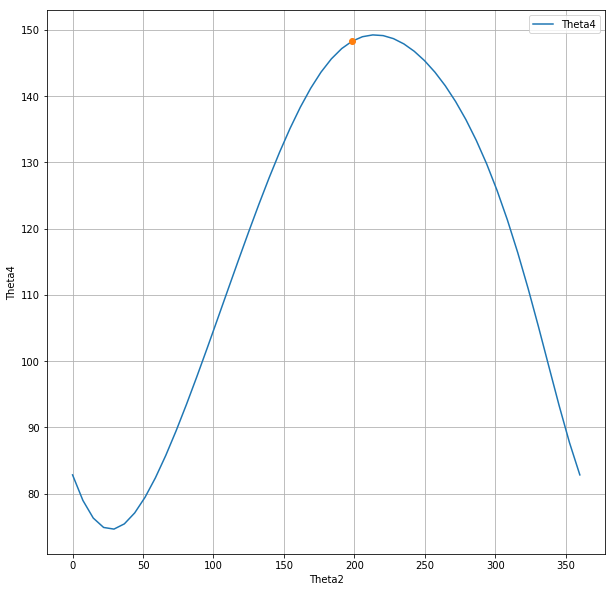

In [5]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(th3v[pos]),'o')
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.legend(["Theta4"])
plt.xlabel("Theta2")
plt.ylabel("Theta4")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(th4v[pos]),'o')
plt.grid()

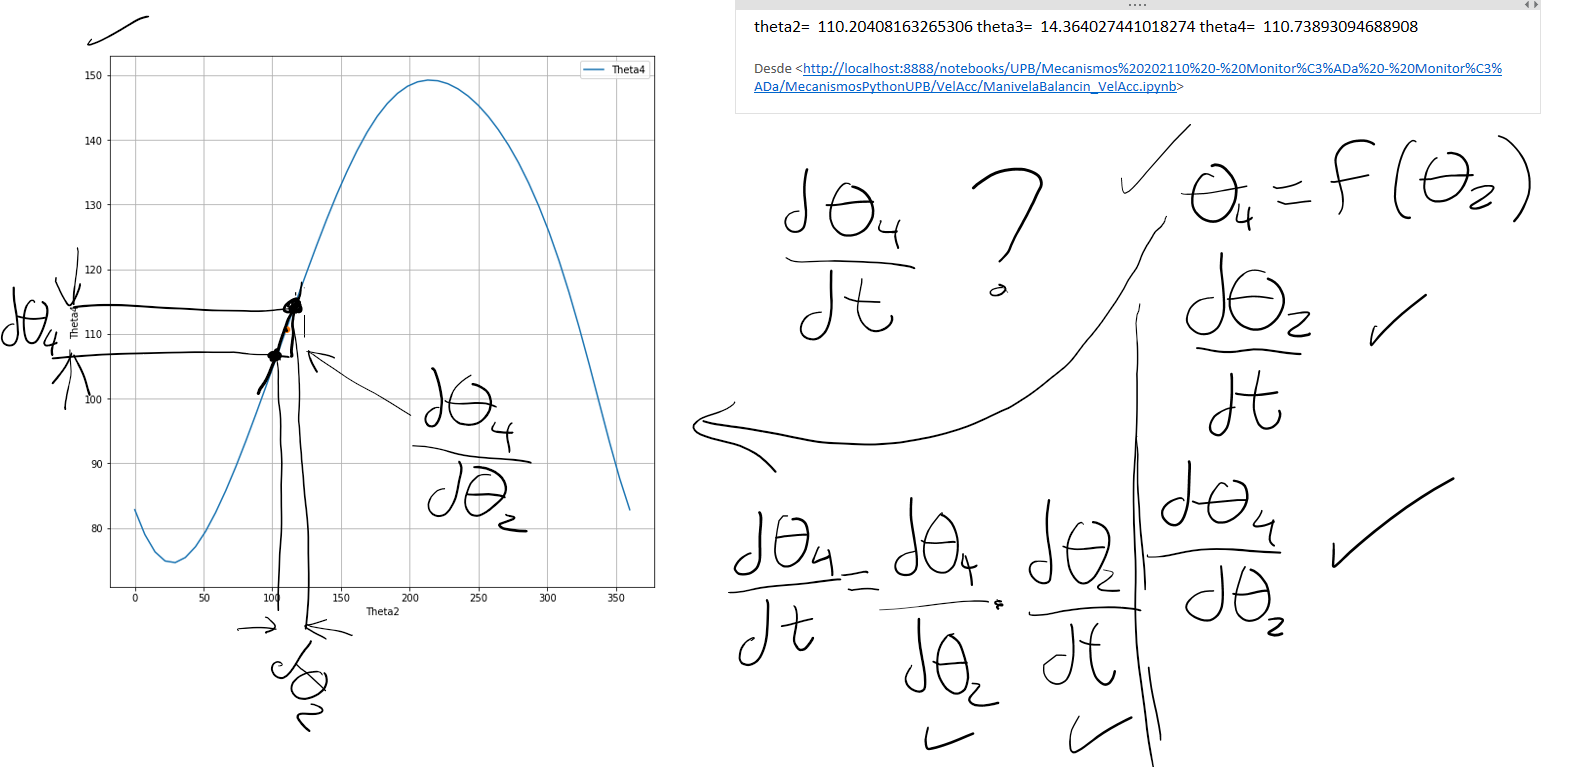

Tips para presentar mejor las gráficas: https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d#:~:text=By%20default%2C%20the%20size%20of,images%20have%20even%20smaller%20dimensions.

In [6]:
difth3 = (th3v[pos+1]-th3v[pos-1])
difth2 = (th2v[pos+1]-th2v[pos-1])
dth3_th2 = difth3/difth2
difth4 = (th4v[pos+1]-th4v[pos-1])
dth4_th2 = difth4/difth2
#print(difth4)
th3pNum = dth3_th2 * th2p
th4pNum = dth4_th2 * th2p
print(th3p,th3pNum)
print(th4p,th4pNum)

2.2219496238089795 2.216608350146956
0.7613264894225447 0.7643209778794169


## Velocidad de un punto

Ahora si podemos usar la ecuación de velocidad de un punto de cualquier barra (4). 

Primero definamos los puntos que vamos a analizar:

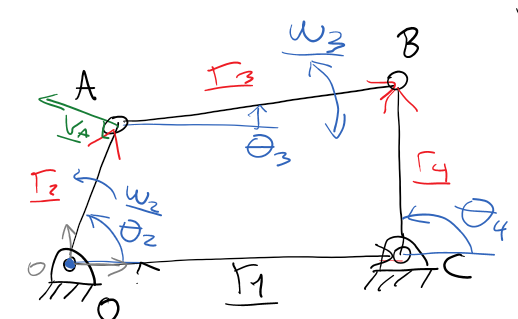

Ahora definamos cada elemento:

In [7]:
w2v = [0,0,th2p]
r2v = [r2*np.cos(th2),r2*np.sin(th2),0]
velA = np.cross(w2v,r2v)
print(velA)

[ 118.79299954 -357.78558752    0.        ]


El vector $\overrightarrow{V_A}$ tiene las componentes de la velocidad del punto A en mm/s

Ahora para calcular $\overrightarrow{V_B}$

In [8]:
w3v = [0,0,th3p]
r3v = [r3*np.cos(th3),r3*np.sin(th3),0]
velB = velA + np.cross(w3v,r3v)
print(velB)

[-40.02229044 -64.76416064   0.        ]


## Graficar vectores de velocidad

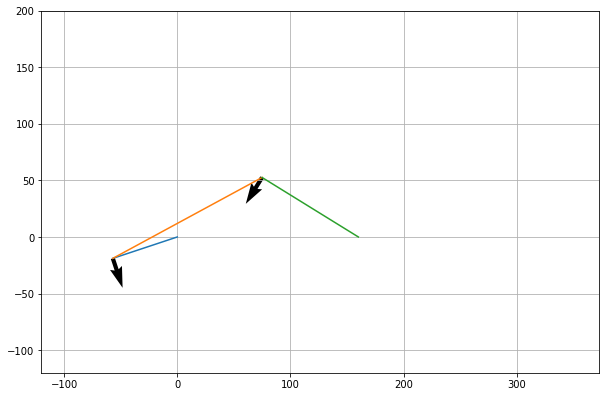

In [9]:
# ## Ubicación de puntos para animación
Ox = 0
Oy = 0
Ax = r2*np.cos(th2v)
Ay = r2*np.sin(th2v)
Bx = Ax + r3*np.cos(th3v)
By = Ay + r3*np.sin(th3v)
Cx = r1*np.cos(th1)
Cy = r1*np.sin(th1)

# ## Preparación de animación
fig = plt.figure()
hr2 = plt.plot([Ox,Ax[pos]],[Oy,Ay[pos]])
hr3 = plt.plot([Bx[pos],Ax[pos]],[By[pos],Ay[pos]])
hr4 = plt.plot([Cx,Bx[pos]],[Cy,By[pos]])

hVA = plt.quiver(Ax[pos], Ay[pos], velA[0], velA[1])
hVB = plt.quiver(Bx[pos], By[pos], velB[0], velB[1])

plt.axis("scaled")
plt.xlim(-r2*2,np.amax(Bx)*2)
plt.ylim(-r2*2,r4*2)
plt.grid()
plt.draw() 

In [10]:
#help(plt.quiver)

## Análisis de velocidad para un rango de valores



In [11]:
#Velocidad analitica
th3pv=np.zeros(numpos)
th4pv=np.zeros(numpos)
velAm=np.zeros((numpos,3))
velBm=np.zeros((numpos,3))
for i in range(0,numpos):
    am = [[-r3*np.sin(th3v[i]),r4*np.sin(th4v[i])],
         [r3*np.cos(th3v[i]),-r4*np.cos(th4v[i])]]
    bv = [[r2*np.sin(th2v[i])*th2p],
         [-r2*np.cos(th2v[i])*th2p]]
    xv = np.linalg.solve(am,bv)
    th3pv[i] = xv[0]
    th4pv[i] = xv[1]
    
    w2v = [0,0,th2p]
    r2v = [r2*np.cos(th2v[i]),r2*np.sin(th2v[i]),0]
    velA = np.cross(w2v,r2v)
    #print(velA)
    w3v = [0,0,th3pv[i]]
    r3v = [r3*np.cos(th3v[i]),r3*np.sin(th3v[i]),0]
    velB = velA + np.cross(w3v,r3v)
    #print(velB)
    velAm[i,:] = velA
    velBm[i,:] = velB
    
th3pNumv=np.gradient(th3v,th2v)*th2p
th4pNumv=np.gradient(th4v,th2v)*th2p
#print(velAv)

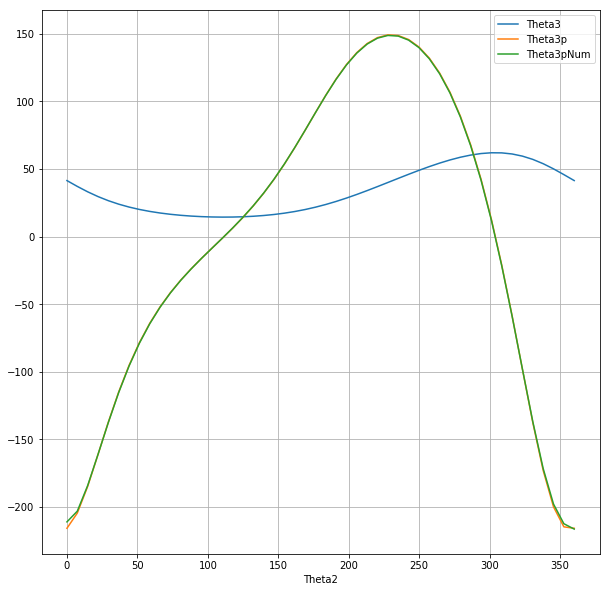

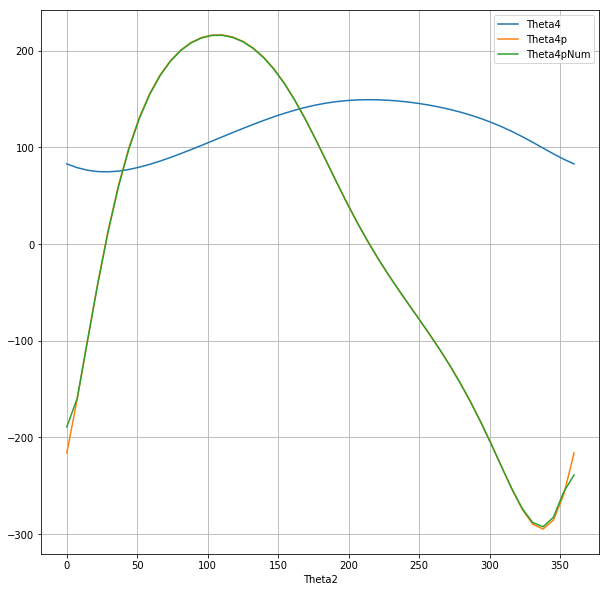

In [12]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.plot(np.rad2deg(th2v),np.rad2deg(th3pv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th3pNumv))
plt.legend(["Theta3","Theta3p","Theta3pNum"])
plt.xlabel("Theta2")
#plt.ylabel("Theta3")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pNumv))
plt.legend(["Theta4","Theta4p","Theta4pNum"])
plt.xlabel("Theta2")
#plt.ylabel("Theta4")
plt.grid()

In [13]:
# ## Animación
# 
# Definimos la función que dibuja cada cuadro (plot)

# In[177]:


def animar(i):
    manivelaX = np.array([Ox,Ax[i]])
    manivelaY = np.array([Oy,Ay[i]])
    acopladorX = np.array([Bx[i],Ax[i]])
    acopladorY = np.array([By[i],Ay[i]])
    balancinX = np.array([Cx,Bx[i]])
    balancinY = np.array([Cy,By[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hr4[0].set_xdata(balancinX)
    hr4[0].set_ydata(balancinY)
    hVA.set_offsets([Ax[i], Ay[i]])
    hVA.set_UVC(velAm[i,0],velAm[i,1])
    hVB.set_offsets([Bx[i], By[i]])
    hVB.set_UVC(velBm[i,0],velBm[i,1])


animacion = FuncAnimation(fig, animar, interval=3000/numpos, save_count=numpos)

# Si se desea visualizar en un frame HTML5 para animaciones que queden muy pesadas en GIF (descomentar para publicación en NBViewer):

from IPython.display import HTML
HTML(animacion.to_html5_video())